In [0]:
!pip install geopandas
!pip install descartes
!pip install mplleaflet
!pip install seaborn

In [0]:
import numpy as np
import pandas as pd
import geopandas as gpd
from functools import reduce 

import time

import matplotlib as mp
import matplotlib.pyplot as plt
import mplleaflet
import descartes
import seaborn as sns
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
sns.set(font_scale=2)

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
from google.cloud import bigquery
client = bigquery.Client('thesisprojects2019')

In [0]:
#import london statistic table from bigquery
query = """ 
                 SELECT a.*
                 FROM `thesisprojects2019.audeMS.step3_statistic_district_homelocation_spectatorswithhome` as a
                 ORDER BY eventid """
data = client.query(query).to_dataframe()

In [0]:
data.head(2)

,venueid,eventid,event,district_id,district_name,count_spect_district,perc_spect_district
0,1,1_2017-11-04,Barbarians New Zealand,E09000030,Tower Hamlets,10,1.339
1,1,1_2017-11-04,Barbarians New Zealand,E09000006,Bromley,10,1.339


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import the london shapefiles from GoogleDrive
pathdrive = 'drive/My Drive/Colab Notebooks/Shapefiles/District/Local_Authority_Districts_December_2017_Super_Generalised_Clipped_Boundaries_in_Great_Britain.shp'
geom_data = gpd.read_file(pathdrive)

In [0]:
geom_data.head(2)

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.365265e+07,59467.502291,"POLYGON ((447851.2015000004 537036.0043000001,..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.410254e+07,38474.532954,(POLYGON ((450791.1017000005 520932.5039000008...


In [0]:
len(geom_data)

380

In [0]:
# CRS for London Ward
crs = {'init': 'epsg:4326'}
district = geom_data.to_crs({'init':'epsg:27700'})

# rename the columns
district = district.rename(columns={'lad17nm':'district_name','lad17cd':'district_id'})
# Select only the columns of interest
district = district[['district_id','district_name','geometry']]

In [0]:
district.head(2)

,district_id,district_name,geometry
0,E06000001,Hartlepool,"POLYGON ((447851.2015000004 537036.0043000001,..."
1,E06000002,Middlesbrough,(POLYGON ((450791.1017000005 520932.5039000008...


In [0]:
# Join Districts SHP with data_homelocation_count
jointable = pd.merge(data,district,how='right', on=['district_id'])
jointable = jointable[['venueid','eventid','event','district_id','district_name_x','perc_spect_district','geometry']]
jointable = jointable.sort_values('district_id').reset_index(drop=True)
jointable['perc_spect_district'] = round(jointable['perc_spect_district'],3)

In [0]:
#def GetDataFrame(datasource):
  # Selection event

    # Mergedata 
    dataevent = data[data['eventid']==e]
    datajoin = pd.merge(dataevent,district,how='right',on=['district_id'])
    datajoin = datajoin[['venueid','eventid','event','district_id','district_name_x','perc_spect_district','geometry']]
    
    # select the event name
    eventname = datajoin['event'][0]
    
    # change to gdp
    gpd_df = gpd.GeoDataFrame(datajoin, geometry='geometry', crs={'init': 'epsg:27700'})
      
    # If NaN -> change it to 0!   
    values = {'venueid': 0, 'eventid':0,'perc_spect_district':0}  
    gpd_df = gpd_df.fillna(value=values)
      
    # Selection the variable to plot
    var_map = gpd_df['perc_spect_district']
      
    # Set the range for the choropleth
    vmin = gpd_df['perc_spect_district'].min()
    vmax = gpd_df['perc_spect_district'].max()
      
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(8, 10), dpi=200)
 #   fig, ax = plt.subplots(1, figsize=(18, 10))
 
    # create map
    gpd_df.plot(column=var_map, cmap='YlGn', linewidth=0.6, ax=ax, edgecolor='0.8')
    
    plt.suptitle('Event Catchment Area - Spectators Homelocation', fontsize=12, horizontalalignment = 'center')
    plt.title(str(eventname), fontsize=10, horizontalalignment='center')
    plt.xlabel('Longitude',fontsize=12, horizontalalignment='center')
    plt.ylabel('Latitude',fontsize=12, horizontalalignment='center')
    plt.xticks(horizontalalignment='center', fontsize=9)
    plt.yticks(horizontalalignment='right', fontsize=9)
    
    ax.tick_params(axis='both', which='major', pad=6)
    
    sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal',fraction=0.04, pad=0.09)
    cbar.set_label('% Event Spectators (of total spectators with home)', size=11)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=10)
     
    fig.tight_layout()
    
    plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/District_Home/Home_Spectators/district_map_'+str(eventname)+'.png')
    
    plt.close('all')
    plt.show()

In [0]:
# Get the list of all the events
event_list = data.eventid.unique()

In [0]:
#Download images into google drive
from google.colab import files

In [0]:
#def GetDataFrame(datasource):
  # Selection event
for e in event_list:
    # Mergedata 
    dataevent = data[data['eventid']==e]
    datajoin = pd.merge(dataevent,district,how='right',on=['district_id'])
    datajoin = datajoin[['venueid','eventid','event','district_id','district_name_x','perc_spect_district','geometry']]
    
    # select the event name
    eventname = datajoin['event'][0]
    
    # change to gdp
    gpd_df = gpd.GeoDataFrame(datajoin, geometry='geometry', crs={'init': 'epsg:27700'})
      
    # If NaN -> change it to 0!   
    values = {'venueid': 0, 'eventid':0,'perc_spect_district':0}  
    gpd_df = gpd_df.fillna(value=values)
      
    # Selection the variable to plot
    var_map = gpd_df['perc_spect_district']
      
    # Set the range for the choropleth
    vmin = gpd_df['perc_spect_district'].min()
    vmax = gpd_df['perc_spect_district'].max()
      
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(8, 10), dpi=200)
 #   fig, ax = plt.subplots(1, figsize=(18, 10))
 
    # create map
    gpd_df.plot(column=var_map, cmap='YlGn', linewidth=0.6, ax=ax, edgecolor='0.8')
    
    plt.suptitle('Event Catchment Area - Spectators Homelocation', fontsize=12, horizontalalignment = 'center')
    plt.title(str(eventname), fontsize=10, horizontalalignment='center')
    plt.xlabel('Longitude',fontsize=12, horizontalalignment='center')
    plt.ylabel('Latitude',fontsize=12, horizontalalignment='center')
    plt.xticks(horizontalalignment='center', fontsize=9)
    plt.yticks(horizontalalignment='right', fontsize=9)
    
    ax.tick_params(axis='both', which='major', pad=6)
    
    sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal',fraction=0.04, pad=0.09)
    cbar.set_label('% Event Spectators (of total spectators with home)', size=11)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=10)
     
    fig.tight_layout()
    
    plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/District_Home/Home_Spectators/district_map_'+str(eventname)+'.png')
    
    plt.close('all')
    plt.show()

In [0]:
import os
from google.colab import files

folderpath = '/content/drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/District_Home/Home_Spectators'

for filename in os.listdir(folderpath):
  #print(filename)
  files.download(folderpath+'/'+str(filename))

In [0]:
#SELECT only the districts around London
select_district = ['South Bucks', 'Chiltern','Wycombe','Aylesbury Vale','Hastings','Rother','Wealden','Eastbourne','Lewes',
                  'Harlow','Epping Forest','Brentwood','Basildon','Castle Point','Rochford','Maldon','Chelmsford','Uttlesford','Braintree','Colchester','Tendring',
                  'Gosport','Fareham','Winchester','Havant','East Hampshire','Hart','Rushmoor','Basingstoke and Deane','Test Valley','Eastleigh','New Forest',
                  'Three Rivers','Watford','Hertsmere','Welwyn Hatfield','Broxbourne','East Hertfordshire','Stevenage','North Hertfordshire','St Albans',
                  'Dacorum','Dartford','Gravesham','Sevenoaks','Tonbridge and Malling','Tunbridge Wells','Maidstone','Swale','Ashford','Folkestone and Hythe',
                  'Canterbury','Dover','Thanet','Oxford','Cherwell','South Oxfordshire','Vale of White Horse','West Oxfordshire','Spelthorne','Runnymede', 
                  'Surrey Heath','Woking','Elmbridge','Guildford','Waverley','Mole Valley','Epsom and Ewell','Reigate and Banstead','Tandridge','Worthing',
                  'Arun','Chichester','Horsham','Crawley','Mid Sussex','Adur','City of London','Westminster','Kensington and Chelsea','Hammersmith and Fulham',
                  'Wandsworth','Lambeth','Southwark','Tower Hamlets','Hackney','Islington','Camden','Brent','Ealing','Hounslow','Richmond upon Thames',
                  'Kingston upon Thames','Merton','Sutton','Croydon','Bromley','Lewisham','Greenwich','Bexley','Havering','Barking and Dagenham',
                  'Redbridge','Newham','Waltham Forest','Haringey','Enfield','Barnet','Harrow','Hillingdon','Bracknell Forest','Reading','Slough',
                  'West Berkshire','Windsor and Maidenhead','Wokingham','Milton Keynes','Bedford','Central Bedfordshire','Luton','Southend-on-Sea',
                   'Thurrock','Medway','Brighton and Hove','Portsmouth','Southampton','South Cambridgeshire','Cambridge','Shepway']

In [0]:
# Create a new Geopandas Dataframe for only the district we are interested in!
new_gpd_list = []
for i in select_district:
    new = district[district['district_name']== i]
    new_gpd_list.append(new)
    new_gpd = pd.concat(new_gpd_list)

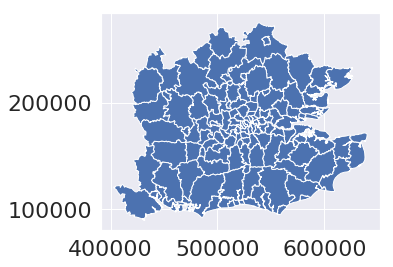

In [0]:
crs = {'init': 'epsg:4326'}
new_gpd = new_gpd.to_crs({'init':'epsg:27700'})
new_gpd.plot()

In [0]:
# Join Districts SHP with data_homelocation_count
jointable_selection = pd.merge(data,new_gpd,how='right', on=['district_id'])
jointable_selection = jointable_selection[['venueid','eventid','event','district_id','district_name_x','perc_spect_district','geometry']]
jointable_selection = jointable_selection.sort_values('district_id').reset_index(drop=True)
jointable_selection['perc_spect_district'] = round(jointable_selection['perc_spect_district'],3)

In [0]:
jointable_selection.head(2)

,venueid,eventid,event,district_id,district_name_x,perc_spect_district,geometry
0,2,2_2017-12-16,Watford Huddersfield,E06000032,Luton,0.637,"POLYGON ((509634.1982000005 224769.9995000008,..."
1,1,1_2017-11-11,England Argentina,E06000032,Luton,0.243,"POLYGON ((509634.1982000005 224769.9995000008,..."


In [0]:
#def GetDataFrame(datasource):
  # Selection event
for e in event_list:
    # Mergedata 
    dataevent = data[data['eventid']==e]
    datajoin = pd.merge(dataevent,new_gpd,how='right',on=['district_id'])
    datajoin = datajoin[['venueid','eventid','event','district_id','district_name_x','perc_spect_district','geometry']]
    
    # select the event name
    eventname = datajoin['event'][0]
    
    # change to gdp
    gpd_df = gpd.GeoDataFrame(datajoin, geometry='geometry', crs={'init': 'epsg:27700'})
      
    # If NaN -> change it to 0!   
    values = {'venueid': 0, 'eventid':0,'perc_spect_district':0}  
    gpd_df = gpd_df.fillna(value=values)
      
    # Selection the variable to plot
    var_map = gpd_df['perc_spect_district']
      
    # Set the range for the choropleth
    vmin = gpd_df['perc_spect_district'].min()
    vmax = gpd_df['perc_spect_district'].max()
      
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(8, 7.5), dpi=200)
  #  fig, ax = plt.subplots(1, figsize=(8, 7.5))
 
    # create map
    gpd_df.plot(column=var_map, cmap='YlGn', linewidth=0.6, ax=ax, edgecolor='0.8')
    
#    plt.suptitle('Event Catchment Area - Spectators Homelocation', fontsize=12, horizontalalignment = 'center')
    plt.title(str(eventname) + ' - Catchment Area', fontsize=12, horizontalalignment='center')
    plt.xlabel('Longitude',fontsize=12, horizontalalignment='center')
    plt.ylabel('Latitude',fontsize=12, horizontalalignment='center')
    plt.xticks(horizontalalignment='center', fontsize=9)
    plt.yticks(horizontalalignment='right', fontsize=9)
    
    ax.tick_params(axis='both', which='major', pad=6)
    
    sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal',fraction=0.04, pad=0.13)
    cbar.set_label('% Event Spectators (of total spectators with home)', size=11)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=10)
     
    fig.tight_layout()
    
    plt.savefig('drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/District_Selection_Home/Home_Spectators/district_selection_map_'+str(eventname)+'.png')
    
    plt.close('all')
    plt.show()

In [0]:
import os
from google.colab import files

folderpath = '/content/drive/My Drive/Dan - Meetings/Thesis Maps & Graphs/District_Selection_Home/Home_Spectators'

for filename in os.listdir(folderpath):
 # print(filename)
  files.download(folderpath+'/'+str(filename))